In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("DeceptiveVisProject/Metadata_Country_API_4_DS2_en_csv_v2_3054086.csv")
df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [12]:
df_grp = df.groupby(['Region', 'IncomeGroup'])['Country Code'].count()

In [15]:
df_grp = df_grp.reset_index()

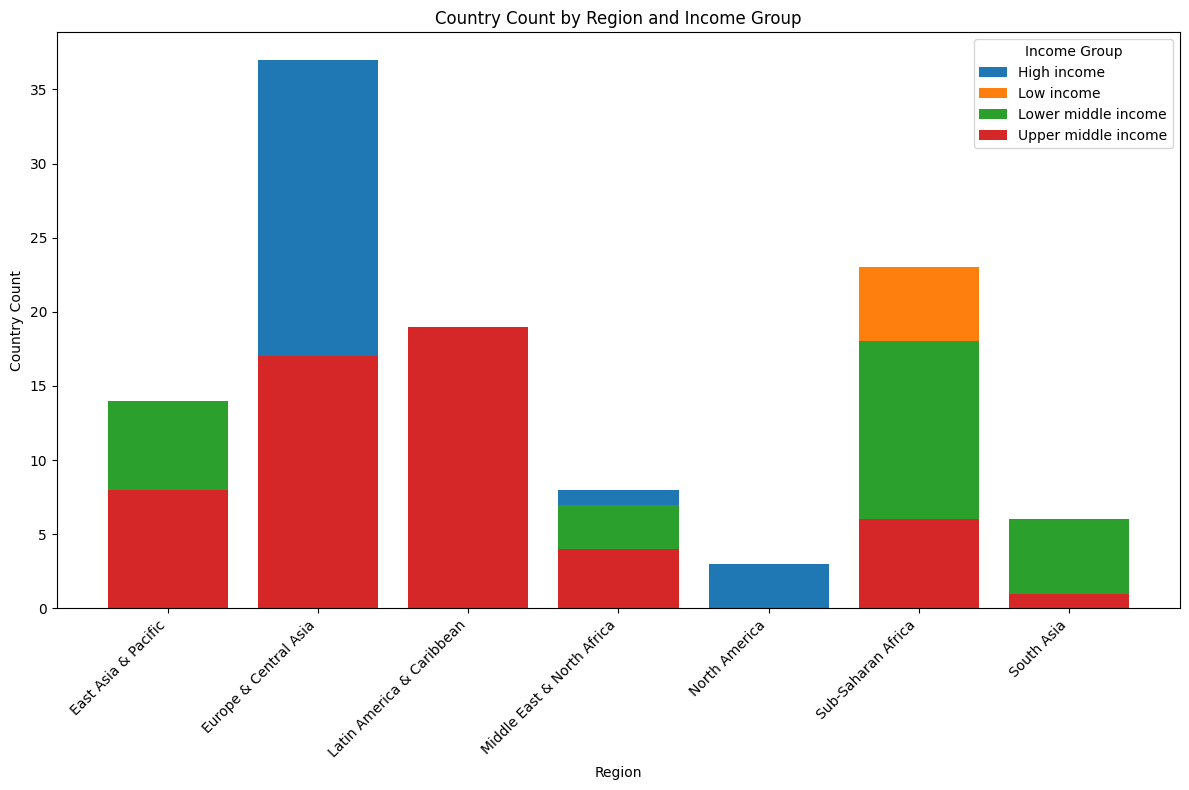

In [16]:
plt.figure(figsize=(12, 8))
for income_group in df_grp['IncomeGroup'].unique():
    subset = df_grp[df_grp['IncomeGroup'] == income_group]
    plt.bar(subset['Region'], subset['Country Code'], label=income_group)

plt.title('Country Count by Region and Income Group')
plt.xlabel('Region')
plt.ylabel('Country Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

In [17]:
econ_df = pd.read_csv('DeceptiveVisProject/economy-and-growth.csv')
econ_df

,Country Name,Country Code,Year,average_value_DEC alternative conversion factor (LCU per US$),average_value_Discrepancy in expenditure estimate of GDP (current LCU),average_value_GDP (constant 2010 US$),average_value_GDP (constant LCU),average_value_GDP (current LCU),average_value_GDP (current US$),average_value_GDP deflator (base year varies by country),...,average_value_Net primary income (Net income from abroad) (current LCU),average_value_Net primary income (Net income from abroad) (current US$),average_value_Net secondary income (Net current transfers from abroad) (current LCU),average_value_Net secondary income (Net current transfers from abroad) (current US$),"average_value_PPP conversion factor, GDP (LCU per international $)","average_value_PPP conversion factor, private consumption (LCU per international $)",average_value_Price level ratio of PPP conversion factor (GDP) to market exchange rate,average_value_Taxes less subsidies on products (constant LCU),average_value_Taxes less subsidies on products (current LCU),average_value_Taxes less subsidies on products (current US$)
0,Arab World,ARB,1988,NaN,NaN,8.222111e+11,NaN,NaN,4.219210e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Arab Emirates,ARE,1966,4.7619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antigua and Barbuda,ATG,1962,1.7143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,ATG,1971,1.9749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Burundi,BDI,2008,1185.6908,4.610000e+05,1.862084e+09,1.381681e+12,1.911139e+12,1.611836e+09,138.319844,...,-5.098471e+09,-4.300000e+06,3.904480e+11,3.293000e+08,369.595027,401.714996,0.311713,1.161580e+11,1.578320e+11,1.331140e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15580,Vanuatu,VUT,2013,94.5425,-4.542000e+09,7.020207e+08,5.767300e+10,7.169200e+10,7.583045e+08,124.307735,...,-2.962650e+07,-3.133670e+05,1.961366e+09,2.074587e+07,99.364947,115.001175,1.051008,6.292000e+09,8.087000e+09,8.553825e+07
15581,World,WLD,1998,NaN,NaN,4.637559e+13,NaN,NaN,3.140058e+13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15582,World,WLD,2014,NaN,NaN,7.388368e+13,NaN,NaN,7.946886e+13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15583,"Yemen, Rep.",YEM,1969,4.4379,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
econ_grp = econ_df.groupby(['Country Name', 'Year'])['average_value_GDP (constant LCU)'].mean()
us_gdp = econ_grp.loc['United States']

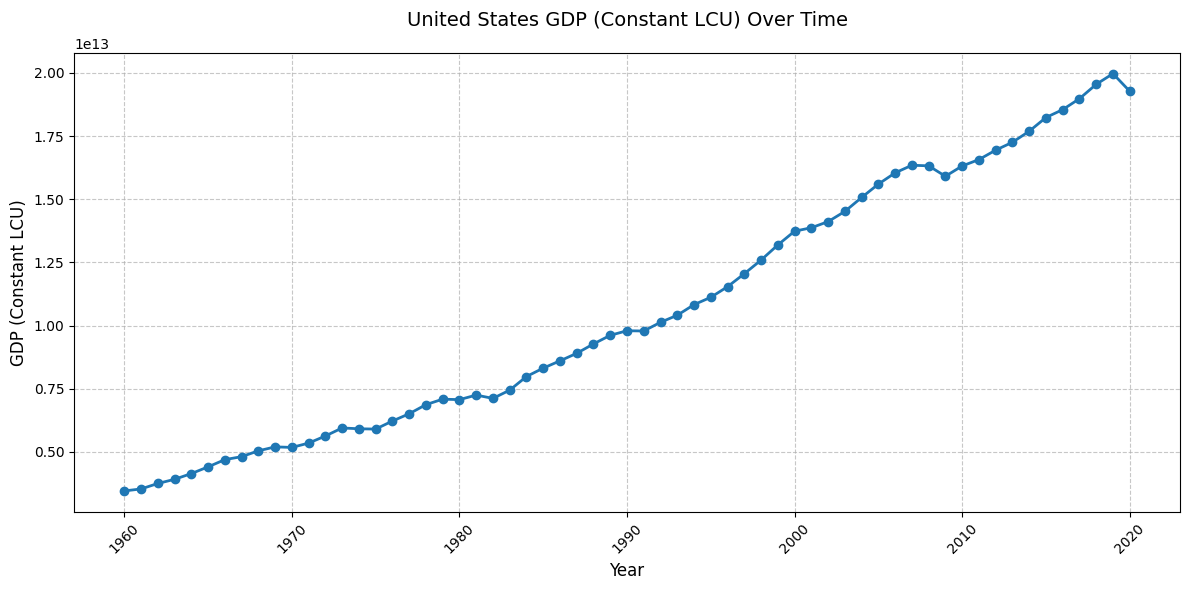

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(us_gdp.index, us_gdp.values, color='#1f77b4', marker='o', linestyle='-', linewidth=2)
plt.title('United States GDP (Constant LCU) Over Time', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (Constant LCU)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()